In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
mall=pd.read_csv("demo5.csv")
print (mall.head())
print (mall.info())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [3]:
x = mall[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [4]:
wcss_list = []
silhouette_scores = []

In [5]:
for i in range(2, 11):
    kmeans_test = KMeans(n_clusters=i, init='k-means++',random_state=0)
    kmeans_test.fit(x_scaled)
    wcss_list.append(kmeans_test.inertia_)
    silhouette_scores.append(silhouette_score(x_scaled, kmeans_test.labels_))

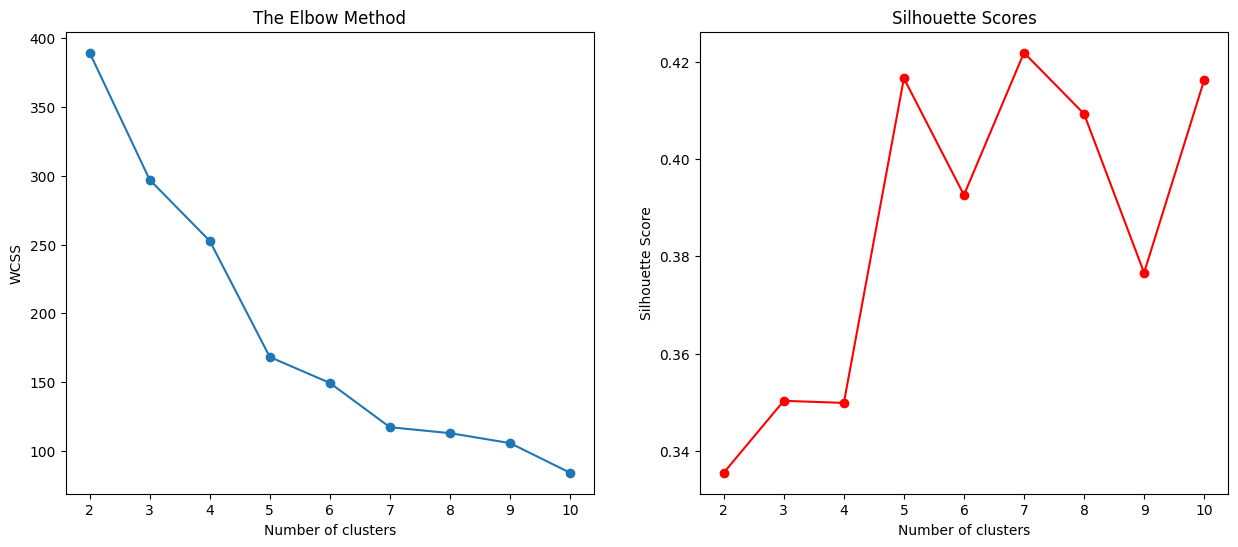

In [6]:
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), wcss_list, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2,11))
plt.ylabel('WCSS')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.xticks(np.arange(2,11))
plt.ylabel('Silhouette Score')
plt.show()

In [7]:
optimal_clusters = 5 
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=0)
y_kmeans = kmeans.fit_predict(x_scaled)

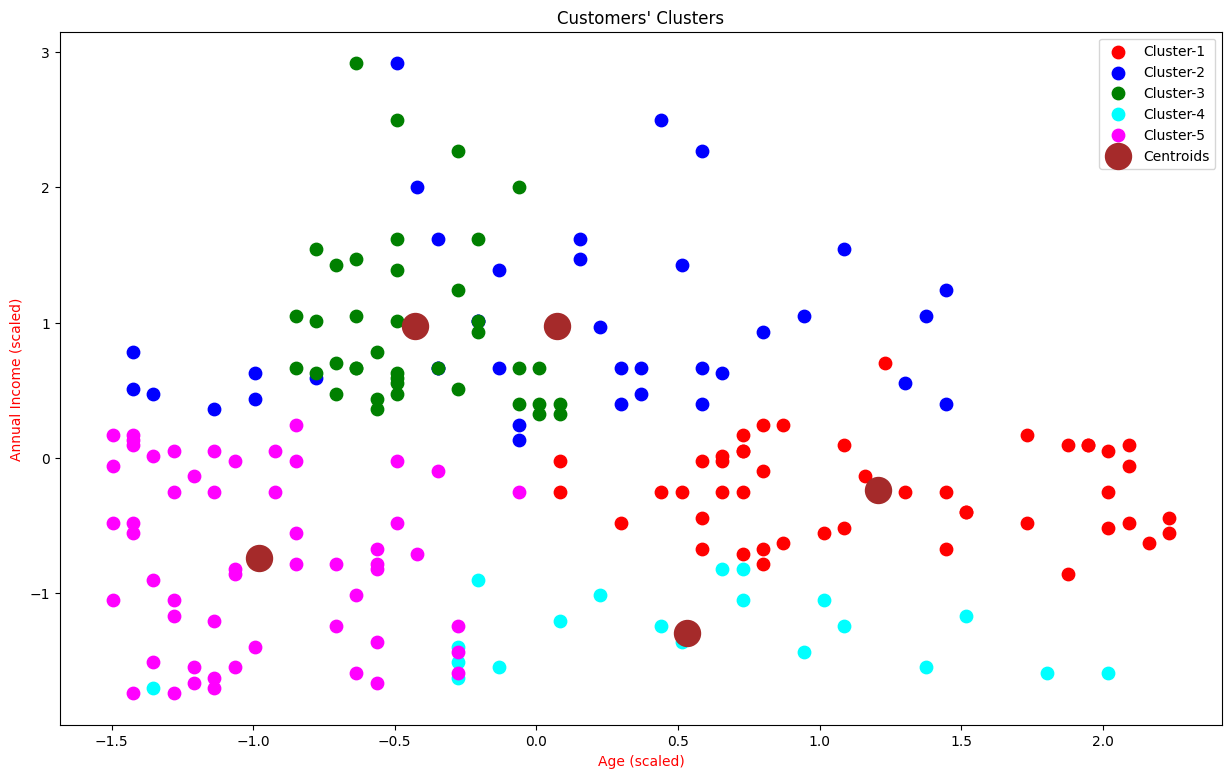

In [8]:
plt.figure(1,figsize=(15,9))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(optimal_clusters):
    plt.scatter(x_scaled[y_kmeans == i, 0], x_scaled[y_kmeans == i, 1], s = 80, c = colors[i], label = f'Cluster-{i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 350, c = 'brown', label = 'Centroids')
plt.title("Customers' Clusters")
plt.xlabel('Age (scaled)', color='red')
plt.ylabel('Annual Income (scaled)',color='red')
plt.legend()
plt.show()

In [9]:
mall['Cluster'] = y_kmeans

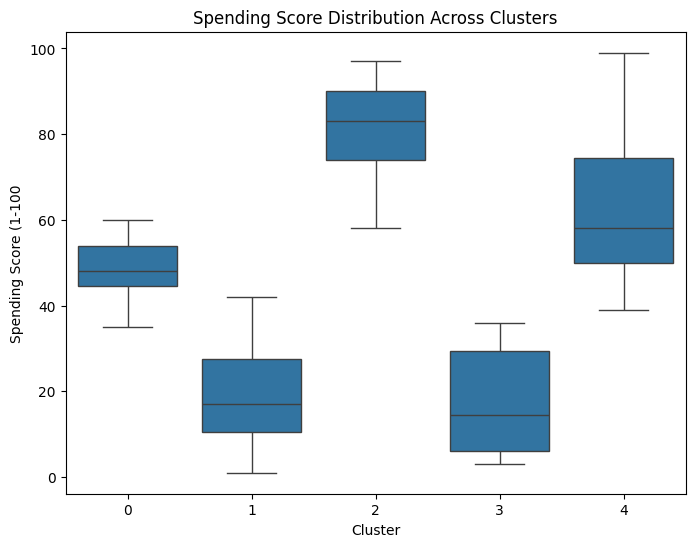

In [10]:
cluster_profile_spending = mall.groupby('Cluster')['Spending Score (1-100)'].mean()

plt.figure(figsize=(8, 6))
sns.boxplot(x='Cluster' , y='Spending Score (1-100)' , data=mall)
plt.title('Spending Score Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Spending Score (1-100')
plt.show()

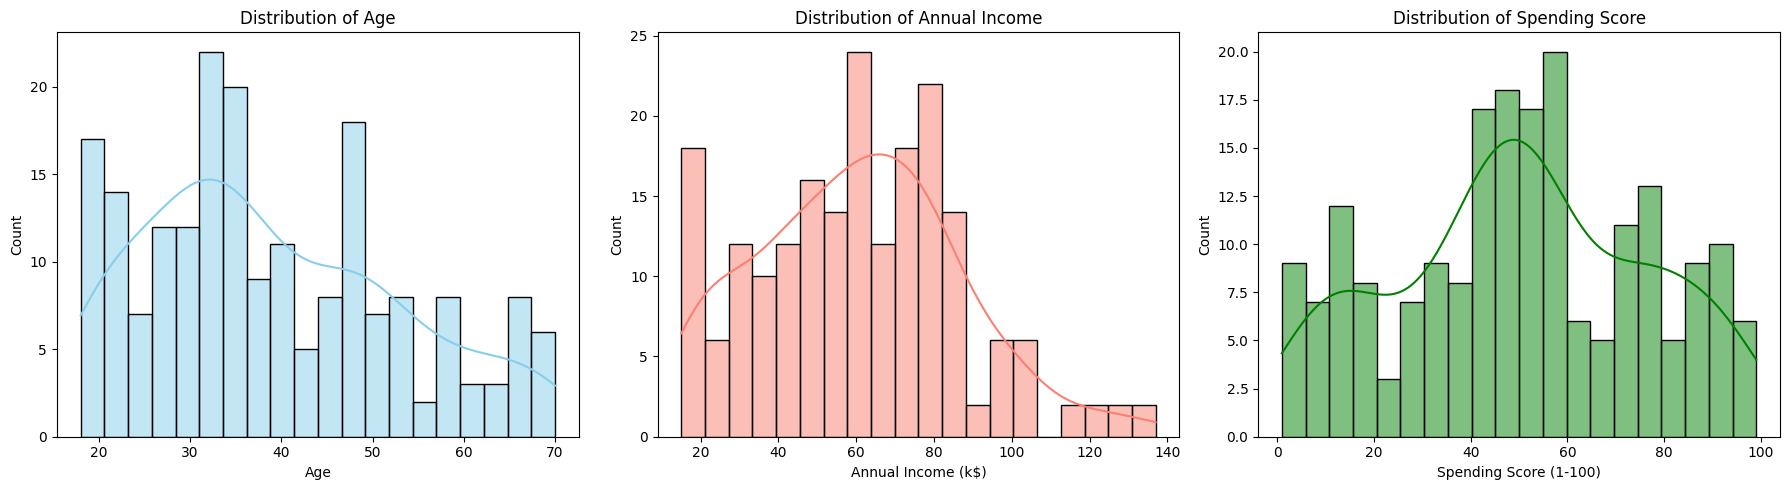

In [12]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=mall, x='Age', bins=20, kde=True, color='skyblue')
plt.title("Distribution of Age")
plt.xlabel("Age")

plt.subplot(1, 3, 2)
sns.histplot(data=mall, x='Annual Income (k$)', bins=20, kde=True, color='salmon')
plt.title("Distribution of Annual Income")
plt.xlabel('Annual Income (k$)')

plt.subplot(1, 3, 3)
sns.histplot(data=mall, x='Spending Score (1-100)', bins=20, kde=True, color='green')
plt.title('Distribution of Spending Score')
plt.xlabel('Spending Score (1-100)')

plt.tight_layout()

plt.show()